In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm
import swordfish as sf
from WIMpy import DMUtils as DMU

%matplotlib inline

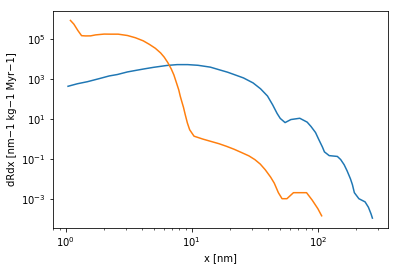

In [3]:
x, dRdx = np.loadtxt("../Data/Zabuyelite_500GeV.txt", unpack=True)
xbkg, dRdxbkg = np.loadtxt("../Data/Zabuyelite_neutrinoBKG.txt", unpack=True)
plt.loglog(x,dRdx)
plt.loglog(xbkg, dRdxbkg)
plt.ylabel(r"dRdx [nm−1 kg−1 Myr−1]")
plt.xlabel(r"x [nm]")
plt.show()

In [17]:
ref_sig = 1e-45
Nevents = np.trapz(dRdx,x=x)
print(Nevents)

83579.97086152896


In [18]:
# For a 1kg Myr exposure they place their limit at roughly 1e-48 for a 500 GeV particle
# Lets therefore scale our rate down by a factor of 10^3 
# They also use a rough cut off at 10nm so we will only consider events longer than this

In [19]:
dRdx_lim = dRdx*1e-3
Nevents_lim = np.trapz(dRdx_lim[x>10],x=x[x>10])
print("Number of events needed for a discovery =", Nevents_lim)
print("According to Baum cut and count...")

Number of events needed for a discovery = 45.53000127652895
According to Baum cut and count...


In [37]:
# Lets load some backgrounds and do a simple spectral analysis on the shapes
x_bins = np.logspace(0,2.5,15)
x_binw = np.diff(x_bins)
x_c = x_bins[:-1] + x_binw/2.
from scipy.interpolate import interp1d
sig_interp = interp1d(x, dRdx, bounds_error=False, fill_value=0.0)
bkg_interp = interp1d(xbkg, dRdxbkg, bounds_error=False, fill_value=0.0)

[2.90818211e+02 8.12743886e+02 2.24460154e+03 5.59286582e+03
 1.23417086e+04 1.98910806e+04 2.11587054e+04 1.40214470e+04
 5.70787042e+03 2.07391739e+02 2.76162824e+02 9.39510404e+00
 1.41798991e+00 2.13354884e-02] [1.29898032e+05 1.26747720e+05 1.82990098e+05 1.21137757e+05
 1.62945164e+04 9.98362078e+00 4.14439761e+00 2.52594555e+00
 9.36799444e-01 2.86031136e-02 6.21030177e-02 1.00000000e-10
 1.00000000e-10 1.00000000e-10]


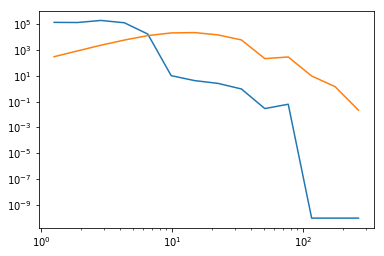

In [41]:
sig = sig_interp(x_c)*x_binw + 1e-10
bkg = bkg_interp(x_c)*x_binw + 1e-10
plt.loglog(x_c,bkg)
plt.loglog(x_c,sig)

SF = sf.Swordfish([bkg], T=[1.0], E=np.ones_like(sig))
print(sig,bkg)

In [45]:
temp = SF.upperlimit(sig, 0.1)
lim = ref_sig * temp
sig_lim = sig * temp
print("Limit from spectral analysis =", lim)
Nevents_lim = np.trapz(sig_lim[x_c > 10], x=x_c[x_c > 10])
print("This corresponds to roughly", Nevents_lim)

Limit from spectral analysis = 8.485875725712111e-50
This corresponds to roughly 26.049611292812607
